

# Principal Component Fun



In [0]:
import numpy as np
import matplotlib.pylab as plt

cmap = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

In [0]:
def f(x, m=1, b=0):
  return m*x + b

def noisy_data(n_datapoints = 400, X_range = 10, sigma = 1, m = 1, b=0):
  X = np.linspace(0, X_range, num=n_datapoints)
  eps = sigma*np.random.randn(n_datapoints)
                      
  Y = f(X, m, b) + eps
  data = np.transpose(np.vstack((X, Y)))

  return data

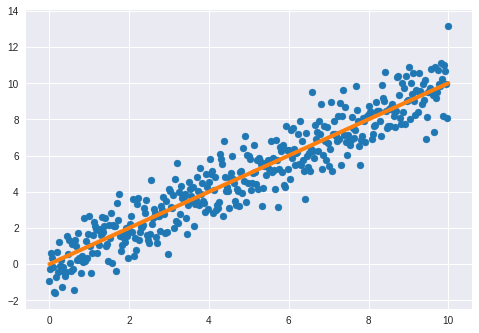

In [3]:
data = noisy_data()

plt.style.use('seaborn')
plt.plot(data[:,0], f(data[:,0]), color=cmap[1], lw=4)
plt.scatter(data[:,0], data[:,1], color=cmap[0])
plt.show()

## Principal Component Analysis

In [0]:
from sklearn.decomposition import PCA
from numpy import linalg

In [0]:
def perform_pca(data, n_components=2):
  pca = PCA(n_components=2)
  pca.fit_transform(data)
  return pca

In [0]:
pca = perform_pca(data, n_components=2)
cov_mat = pca.get_covariance()
pc = pca.components_
_, eigen_vectors = linalg.eig(cov_mat)

In [7]:
print("Eigenvectors Covariance Matrix: \n" + str(eigen_vectors))
print("\nPrincipal Components: \n" + str(pc))

Eigenvectors Covariance Matrix: 
[[-0.73280942 -0.68043394]
 [ 0.68043394 -0.73280942]]

Principal Components: 
[[ 0.68043394  0.73280942]
 [ 0.73280942 -0.68043394]]


In [11]:
m=4
sigma = 1

data_new = noisy_data(m=m, sigma=sigma)

pca_new = perform_pca(data_new, n_components=2)
cov_mat_new = pca_new.get_covariance()
pc_new = pca_new.components_

m_pca_new = pc_new[0,1]/pc_new[0,0]
m_pca = pc[0,1]/pc[0,0]

print("m=1, slope principal component: " + str(m_pca))
print("m=" + str(m) + ", slope principal component: " + str(m_pca_new))


m=1, slope principal component: 1.0769736415879274
m=4, slope principal component: 4.062232289836931
